In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("train.csv")
len(df)

550068

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
pd.Series(df.columns)

0                        User_ID
1                     Product_ID
2                         Gender
3                            Age
4                     Occupation
5                  City_Category
6     Stay_In_Current_City_Years
7                 Marital_Status
8             Product_Category_1
9             Product_Category_2
10            Product_Category_3
11                      Purchase
dtype: object

In [8]:
df = df.drop(['Product_ID','User_ID'],axis=1)

In [9]:
# Gender

In [10]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

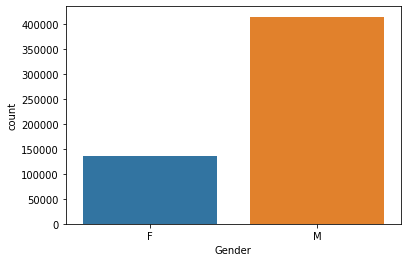

In [11]:
sns.countplot(df['Gender'])

In [12]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [13]:
# Age

In [14]:
resetter = pd.DataFrame(df.Age.value_counts().sort_index()).drop('Age',axis=1)
resetter.reset_index(level=0, inplace=True)
resetter.index += 1
resetter.reset_index(level=0, inplace=True)
resetter = resetter.set_index('index')
resetter = resetter.to_dict().get('level_0')
resetter

{'0-17': 1,
 '18-25': 2,
 '26-35': 3,
 '36-45': 4,
 '46-50': 5,
 '51-55': 6,
 '55+': 7}

In [15]:
df['Age'] = df['Age'].map(resetter)
df['Age'].value_counts()

3    219587
4    110013
2     99660
5     45701
6     38501
7     21504
1     15102
Name: Age, dtype: int64

In [16]:
# City Category

In [17]:
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [18]:
df = pd.get_dummies(df, columns=['City_Category'], drop_first=True)

In [19]:
# Stay in current city

In [20]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [21]:
df.loc[df['Stay_In_Current_City_Years'] == '4+',"Stay_In_Current_City_Years"] = 4

In [22]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)

In [23]:
# Marital_Status

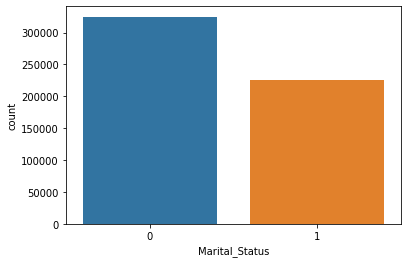

In [24]:
sns.countplot(df.Marital_Status)

In [25]:
# City_Category

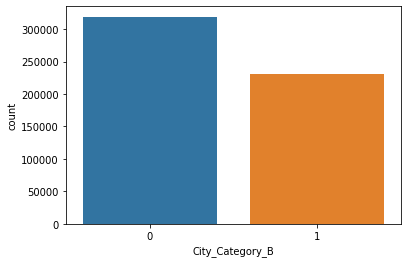

In [26]:
sns.countplot(df.City_Category_B)

In [27]:
# Product Category

In [28]:
df.Product_Category_1 = df.Product_Category_1.astype(float)

In [29]:
from collections import Counter

In [30]:
all_c = dict(Counter(df.Product_Category_3.value_counts().sort_index().to_dict()) + Counter(df.Product_Category_2.value_counts().sort_index().to_dict()) + Counter(df.Product_Category_1.value_counts().sort_index().to_dict()))
all_c = sorted(all_c.items(), key=lambda x: x[1], reverse=True)

all_c,len(all_c)

([(5.0, 193826),
  (8.0, 190575),
  (1.0, 140378),
  (16.0, 85719),
  (14.0, 75059),
  (2.0, 73081),
  (15.0, 72158),
  (6.0, 41822),
  (11.0, 40226),
  (4.0, 39305),
  (17.0, 30600),
  (3.0, 23710),
  (13.0, 21539),
  (12.0, 18721),
  (9.0, 17682),
  (18.0, 10524),
  (10.0, 9894),
  (7.0, 4347),
  (20.0, 2550),
  (19.0, 1603)],
 20)

In [31]:
list_of_cat = []
rest_of_cat = []
def prod_cat_label(limit):
    ca_c = 0
    for i in range(len(all_c)):
        if(i<limit):
            ca_c = ca_c + all_c[i][1]
            list_of_cat.append(all_c[i][0])
        else:
            rest_of_cat.append(all_c[i][0])
    for i in list_of_cat:
        df['prod_cat_'+str(i)] = (df['Product_Category_1']==i) | (df['Product_Category_2']==i) | (df['Product_Category_3']==i)
        df['prod_cat_'+str(i)] = df['prod_cat_'+str(i)].astype(int)
    df['rest_cat'] = 0    
    for i in rest_of_cat:
        df['rest_cat'] = (df['rest_cat']) | (df['Product_Category_1']==i) | (df['Product_Category_2']==i) | (df['Product_Category_3']==i)
    df['rest_cat'] = df['rest_cat'].astype(int)    
    return ca_c

In [32]:
total_c = 0
for i in range(len(all_c)):
    total_c += all_c[i][1]

ca_c = prod_cat_label(0)                                    # Product category feature encoding limit
print(list_of_cat,rest_of_cat)
total_c,ca_c,total_c-ca_c

[] [5.0, 8.0, 1.0, 16.0, 14.0, 2.0, 15.0, 6.0, 11.0, 4.0, 17.0, 3.0, 13.0, 12.0, 9.0, 18.0, 10.0, 7.0, 20.0, 19.0]


(1093319, 0, 1093319)

In [33]:
df = df.drop(['Product_Category_1','Product_Category_2','Product_Category_3'],axis=1)
df.rest_cat.value_counts()
df = df.drop('rest_cat',axis=1) # Comment if not zero

In [34]:
# Occupation

In [35]:
all_o = dict(df.Occupation.value_counts().sort_values(ascending = True))
all_o = [(k, v) for k, v in all_o.items()]
all_o,len(all_o)

([(8, 1546),
  (9, 6291),
  (18, 6622),
  (13, 7728),
  (19, 8461),
  (11, 11586),
  (15, 12165),
  (5, 12177),
  (10, 12930),
  (3, 17650),
  (6, 20355),
  (16, 25371),
  (2, 26588),
  (14, 27309),
  (12, 31179),
  (20, 33562),
  (17, 40043),
  (1, 47426),
  (7, 59133),
  (0, 69638),
  (4, 72308)],
 21)

In [36]:
total_o = 0
rm_o = 0
for i in range(len(all_o)):
    total_o += all_o[i][1]

In [37]:
df = pd.get_dummies(df, columns=['Occupation'])
def pro_o_label(limit,df):
    rm_o = 0
    limit = len(all_o) - limit
    for i in range(limit):
        rm_o = rm_o + all_o[i][0]
        df = df.drop(['Occupation_'+str(all_o[i][0])],axis=1)
    return df,rm_o 
df,rm_o = pro_o_label(0,df)                                              # Occupation category feature encoding limit
total_o,total_o-rm_o,rm_o


(550068, 549858, 210)

In [38]:
# EDA 2.0

In [39]:
df.describe()

,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,Gender_M,City_Category_B,City_Category_C
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,3.496430,1.858418,0.409653,9263.968713,0.753105,0.420263,0.311189
std,1.353632,1.289443,0.491770,5023.065394,0.431205,0.493601,0.462980
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,5823.000000,1.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,8047.000000,1.000000,0.000000,0.000000
75%,4.000000,3.000000,1.000000,12054.000000,1.000000,1.000000,1.000000
max,7.000000,4.000000,1.000000,23961.000000,1.000000,1.000000,1.000000


In [40]:
df.corr()['Purchase'].sort_values()[:-1]

City_Category_B              -0.019098
Marital_Status               -0.000463
Stay_In_Current_City_Years    0.005422
Age                           0.015839
Gender_M                      0.060346
City_Category_C               0.061012
Name: Purchase, dtype: float64

In [41]:
# Split

In [42]:
X = df.drop('Purchase',axis=1).values
y = df['Purchase'].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [45]:
## Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train.shape,X_test.shape

((440054, 6), (110014, 6))

In [50]:
# Model building

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
X.shape,y.shape

((550068, 6), (550068,))

In [52]:
model = Sequential()

model.add(Dense(6,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [53]:
# Training

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [55]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=300,batch_size=128,verbose=1,callbacks=[early_stop])

Train on 440054 samples, validate on 110014 samples
Epoch 1/300
440054/440054 [==============================] - 10s 23us/sample - loss: 74490162.3080 - val_loss: 46373562.0386
Epoch 2/300
440054/440054 [==============================] - 10s 22us/sample - loss: 63497438.5165 - val_loss: 40069043.5662
Epoch 3/300
440054/440054 [==============================] - 9s 21us/sample - loss: 58143626.9240 - val_loss: 37989007.2751
Epoch 4/300
440054/440054 [==============================] - 11s 25us/sample - loss: 55153927.3258 - val_loss: 35667787.7312
Epoch 5/300
440054/440054 [==============================] - 10s 22us/sample - loss: 52003934.0909 - val_loss: 33670610.5828
Epoch 6/300
440054/440054 [==============================] - 9s 21us/sample - loss: 50228888.1895 - val_loss: 32700487.5781
Epoch 7/300
440054/440054 [==============================] - 10s 22us/sample - loss: 49562028.1887 - val_loss: 32488053.3626
Epoch 8/300
440054/440054 [==============================] - 10s 22us/sampl

Epoch 66/300
440054/440054 [==============================] - 10s 22us/sample - loss: 38822673.3845 - val_loss: 27493149.0214
Epoch 67/300
440054/440054 [==============================] - 10s 22us/sample - loss: 38820298.9079 - val_loss: 27638605.1132
Epoch 68/300
440054/440054 [==============================] - 10s 22us/sample - loss: 38852577.6556 - val_loss: 27583300.2590
Epoch 69/300
440054/440054 [==============================] - 10s 22us/sample - loss: 38770177.5687 - val_loss: 27603022.6097
Epoch 70/300
440054/440054 [==============================] - 10s 23us/sample - loss: 38741992.3028 - val_loss: 27453744.8103
Epoch 71/300
440054/440054 [==============================] - 10s 22us/sample - loss: 38749291.4985 - val_loss: 27497389.0406
Epoch 72/300
440054/440054 [==============================] - 10s 23us/sample - loss: 38688723.0940 - val_loss: 27532900.1819
Epoch 00072: early stopping


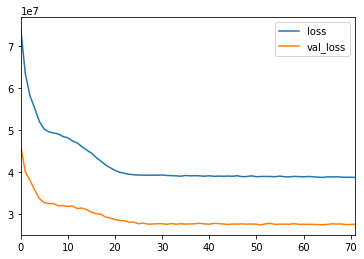

In [56]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [57]:
# Evaluation

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [59]:
predictions = model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test,predictions))

5247.180175222248

In [62]:
df['Purchase'].mean()

9263.968712959126

In [67]:
# Tweak occupation and Product category dummy methods for better results
# Initially, both the features are dropped